In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
import yfinance as yfin
from bs4 import BeautifulSoup
import bs4 as bs
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
yfin.pdr_override()
import requests
import os
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import numpy as np
%matplotlib notebook

style.use('ggplot')

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open('sp500tickers.pickle', 'wb') as f:
        pickle.dump(tickers, f)
    return tickers

save_sp500_tickers()

['MMM\n',
 'AOS\n',
 'ABT\n',
 'ACN\n',
 'ATVI\n',
 'ADM\n',
 'ADBE\n',
 'ADP\n',
 'AAP\n',
 'ABBV\n',
 'AES\n',
 'AFL\n',
 'A\n',
 'APD\n',
 'AKAM\n',
 'ALK\n',
 'ALB\n',
 'ARE\n',
 'ALGN\n',
 'ALLE\n',
 'LNT\n',
 'ALL\n',
 'GOOGL\n',
 'GOOG\n',
 'MO\n',
 'AMZN\n',
 'AMCR\n',
 'AMD\n',
 'AEE\n',
 'AAL\n',
 'AEP\n',
 'AXP\n',
 'AIG\n',
 'AMT\n',
 'AWK\n',
 'AMP\n',
 'ABC\n',
 'AME\n',
 'AMGN\n',
 'APH\n',
 'ADI\n',
 'ANSS\n',
 'AON\n',
 'APA\n',
 'AAPL\n',
 'AMAT\n',
 'APTV\n',
 'ACGL\n',
 'ANET\n',
 'AJG\n',
 'AIZ\n',
 'T\n',
 'ATO\n',
 'ADSK\n',
 'AZO\n',
 'AVB\n',
 'AVY\n',
 'BKR\n',
 'BALL\n',
 'BAC\n',
 'BBWI\n',
 'BAX\n',
 'BDX\n',
 'WRB\n',
 'BRK.B\n',
 'BBY\n',
 'BIO\n',
 'TECH\n',
 'BIIB\n',
 'BLK\n',
 'BK\n',
 'BA\n',
 'BKNG\n',
 'BWA\n',
 'BXP\n',
 'BSX\n',
 'BMY\n',
 'AVGO\n',
 'BR\n',
 'BRO\n',
 'BF.B\n',
 'CHRW\n',
 'CDNS\n',
 'CZR\n',
 'CPT\n',
 'CPB\n',
 'COF\n',
 'CAH\n',
 'KMX\n',
 'CCL\n',
 'CARR\n',
 'CTLT\n',
 'CAT\n',
 'CBOE\n',
 'CBRE\n',
 'CDW\n',
 'CE\n',
 'CNC

In [2]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('sp500tickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start = dt.datetime(2010,1,1)
    end = dt.datetime(2022,12,31)
    
    for ticker in tickers:
        print(ticker)
        ticker = ticker.strip()
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

In [3]:
def compile_data():
    with open('sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        ticker = ticker.strip()
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace = True)
        df.rename(columns = {'Adj Close':ticker}, inplace=True)
        df.drop(['Open','High','Low','Close','Volume'], 1, inplace=True)
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
        
        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')
    
      

           MMM       AOS       ABT      ABBV       ACN      ATVI       ADM  \
YUM   0.375441  0.575098  0.484504  0.270254  0.479245 -0.179482  0.044214   
ZBRA  0.893347  0.904008  0.928514 -0.376382  0.916542  0.098249 -0.568218   
ZBH   0.471213  0.516733  0.610572  0.436267  0.535692  0.077217  0.279100   
ZION  0.723027  0.792334  0.810820 -0.312230  0.812229  0.237545 -0.392481   
ZTS   0.844800  0.846178  0.909164 -0.285845  0.881150  0.211511 -0.621254   

          ADBE       ADP       AAP  ...       WTW       GWW      WYNN  \
YUM   0.324058  0.359257  0.074213  ...  0.766771  0.386663  0.725771   
ZBRA  0.929726 -0.443204  0.878824  ...  0.257632 -0.430460  0.557468   
ZBH   0.422389  0.131790  0.280262  ...  0.784102  0.146641  0.682192   
ZION  0.805822 -0.441516  0.790848  ...  0.284505 -0.339082  0.601499   
ZTS   0.925457 -0.466309  0.851569  ...  0.175597 -0.498034  0.468005   

           XEL       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
YUM   0.064333 

<IPython.core.display.Javascript object>


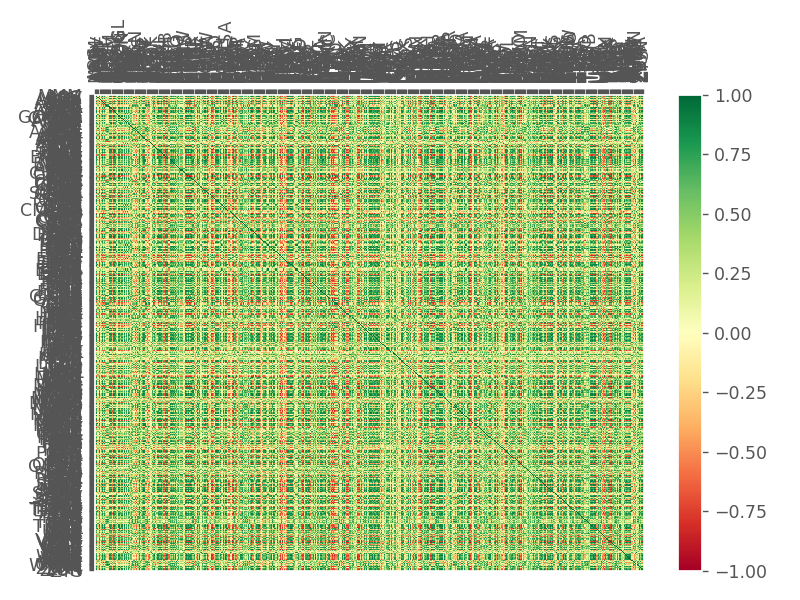

In [4]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes2022.csv')
  #  df['AAPL'].plot()
    df_corr = df.corr()
    print(df_corr.tail())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    
    fig.colorbar(heatmap)
    
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    
visualize_data()

In [5]:
df = pd.read_csv('sp500_joined_closes.csv')
df.corr()

,MMM,AOS,ABT,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
MMM,1.000000,0.915181,0.679204,0.686429,0.832014,0.544656,0.685965,0.702165,0.739322,0.492097,...,0.741402,0.579242,0.369455,0.741722,0.720572,0.755142,0.619397,0.891421,0.787739,0.487331
AOS,0.915181,1.000000,0.860256,0.891228,0.929467,0.768664,0.848844,0.885184,0.827300,0.716830,...,0.893439,0.801475,0.164071,0.885628,0.900871,0.904142,0.811336,0.889433,0.920338,0.821914
ABT,0.679204,0.860256,1.000000,0.981983,0.894452,0.833138,0.973316,0.959426,0.788669,0.921730,...,0.975153,0.920848,-0.016220,0.961323,0.946156,0.963510,0.954962,0.823426,0.863997,0.988492
ACN,0.686429,0.891228,0.981983,1.000000,0.891595,0.868598,0.961244,0.972037,0.810399,0.913192,...,0.966613,0.934561,-0.038200,0.950009,0.954061,0.965376,0.952954,0.801878,0.901042,0.983985
ATVI,0.832014,0.929467,0.894452,0.891595,1.000000,0.754207,0.892940,0.884630,0.720611,0.766625,...,0.917359,0.807818,0.088919,0.922528,0.899432,0.894243,0.823405,0.868668,0.865748,0.844411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.755142,0.904142,0.963510,0.965376,0.894243,0.836071,0.926995,0.977707,0.808014,0.882663,...,0.973939,0.911958,0.070073,0.965588,0.963406,1.000000,0.898324,0.848839,0.911475,0.952380
ZBRA,0.619397,0.811336,0.954962,0.952954,0.823405,0.766462,0.966290,0.888031,0.757040,0.911617,...,0.914326,0.859922,-0.017364,0.867433,0.925521,0.898324,1.000000,0.760991,0.836252,0.952862
ZBH,0.891421,0.889433,0.823426,0.801878,0.868668,0.669980,0.806526,0.809619,0.829437,0.704361,...,0.867529,0.727185,0.264571,0.859697,0.827508,0.848839,0.760991,1.000000,0.778197,0.757594
ZION,0.787739,0.920338,0.863997,0.901042,0.865748,0.826615,0.835644,0.909023,0.760766,0.795322,...,0.882331,0.842872,0.181126,0.850661,0.889928,0.911475,0.836252,0.778197,1.000000,0.814637


In [6]:
def compile_data2():
    with open('sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        ticker = ticker.strip()
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker), index_col='Date')
        
        # Select only rows with a 'Date' index that starts with "2022"
        df = df[df.index.str.startswith('2022')]
        
        df.rename(columns = {'Adj Close':ticker}, inplace=True)
        df.drop(['Open','High','Low','Close','Volume'], 1, inplace=True)
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
        
        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes2022.csv')



In [7]:
'''
df = pd.read_csv('sp500_joined_closes2022.csv')
corr = df.corr()
corr.to_csv('sp500_joined_closes2022_corr.csv')
'''


"\ndf = pd.read_csv('sp500_joined_closes2022.csv')\ncorr = df.corr()\ncorr.to_csv('sp500_joined_closes2022_corr.csv')\n"